# TimeSeries for "A Yen for the Future"

In [138]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

## Return Forecasting: Read Historical Daily Yen Futures Data
In this notebook, you will load historical Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [139]:
# Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration
yen_futures = pd.read_csv(
    Path("yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [140]:
# Trim the dataset to begin on January 1st, 1990
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


## Return Forecasting: Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

<AxesSubplot:xlabel='Date'>

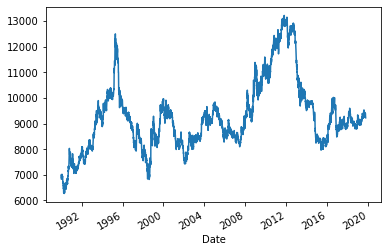

In [141]:
# Plot just the "Settle" column from the dataframe:
yen_futures["Settle"].plot()

## Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the Settle price into a trend and noise.

In [142]:
import statsmodels.api as sm

In [143]:
yen_futures_settle = yen_futures["Settle"]

settle_noise, settle_trend = sm.tsa.filters.hpfilter(yen_futures_settle)

<AxesSubplot:xlabel='Date'>

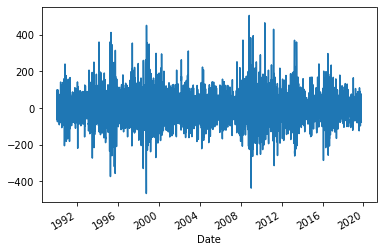

In [144]:
settle_noise.plot()

<AxesSubplot:xlabel='Date'>

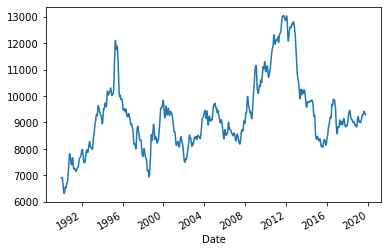

In [145]:
settle_trend.plot()

In [147]:
# Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above:

yen_futures.insert(loc=8, column="Noise", value=settle_noise)
yen_futures.insert(loc=9, column="Trend", value=settle_trend)
yen_futures.info
yen_futures

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Noise,Trend
Date,,,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0,-61.503967,6908.503967
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0,-21.799756,6908.799756
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0,98.942896,6909.057104
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0,40.776052,6909.223948
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0,49.689938,6909.310062
...,...,...,...,...,...,...,...,...,...,...
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,24.939247,9313.060753
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-5.868559,9309.368559
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-54.454594,9305.454594


In [148]:
yen_settle_noise_trend = yen_futures[["Settle", "Noise", "Trend"]]
yen_settle_noise_trend = yen_settle_noise_trend.loc["2015-01-01":, :]
yen_settle_noise_trend

,Settle,Noise,Trend
Date,,,
2015-01-02,8315.0,-79.686404,8394.686404
2015-01-05,8371.0,-30.395762,8401.395762
2015-01-06,8435.0,26.414403,8408.585597
2015-01-07,8412.0,-4.089059,8416.089059
2015-01-08,8360.0,-63.755805,8423.755805
...,...,...,...
2019-10-09,9338.0,24.939247,9313.060753
2019-10-10,9303.5,-5.868559,9309.368559
2019-10-11,9251.0,-54.454594,9305.454594


In [149]:
import matplotlib.pyplot as plt

dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_code_objs',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_docstrings',
 '_warn_if_gui_ou

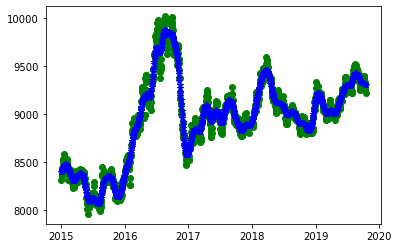

In [150]:
# Plot the Settle Price vs. the Trend for 2015 to the present

plt.plot(yen_settle_noise_trend["Settle"], 'go')
plt.plot(yen_settle_noise_trend["Trend"], 'b*')
plt.show()

## Forecasting Returns using an ARMA Model

Using futures Settle *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [151]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [152]:
import warnings
warnings.filterwarnings("ignore")

In [153]:
# Estimate and ARIMA model using statsmodels (use order=(2, 1))
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(returns.Settle.values, order=(2, 0, 1))

# Fit the model and assign it to a variable called results
results = model.fit()

# Output model summary results:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Sun, 15 Aug 2021   AIC                          15798.142
Time:                        19:51:08   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.422      -0.009       0.022
ar.L1.y       -0.3063      1.277     -0.240      0.811      -2.810       2.197
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2947      1.277      0.231      0.818      -2.209       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3346           +0.0000j            3.3346            0.5000
AR.2         -157.1802           +0.0000j          157.1802            0.5000
MA.1           -3.3935           +0.0000j            3.3935            0.5000
-----------------------------------------------------------------------------
"""

               0
count  7514.0000
mean      0.0000
std       0.6919
min      -4.1345
25%      -0.3811
50%      -0.0122
75%       0.3425
max       8.6483


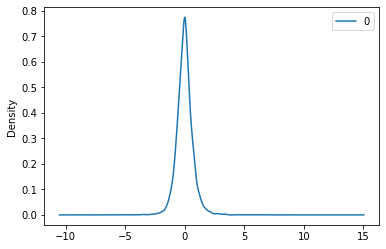

In [154]:
# Plot of residuals
# Density plot chosen to determine bias
residuals = pd.DataFrame(results.resid)
residuals.plot(kind='kde')
# Summary stats of residuals
print(round(residuals.describe(),4))

<AxesSubplot:title={'center':'Returns Forecast'}>

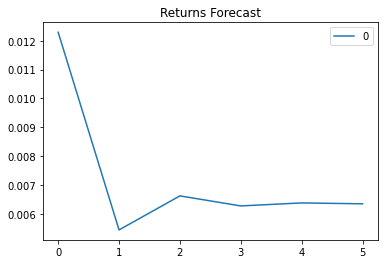

In [155]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(results.forecast(steps=6)[0]).plot(title="Returns Forecast")

## Forecasting the Settle Price using an ARIMA Model

1. Using the *raw* Yen **Settle Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Construct a 5 day forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

In [156]:
# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
model2 = ARIMA(returns.Settle.values, order=(5, 1, 1))

# Fit the model
results2 = model2.fit()

In [157]:
# Output model summary results:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 7513
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -7895.582
Method:                       css-mle   S.D. of innovations              0.692
Date:                Sun, 15 Aug 2021   AIC                          15807.164
Time:                        19:51:27   BIC                          15862.559
Sample:                             1   HQIC                         15826.184
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.204e-06   3.52e-06     -0.911      0.362   -1.01e-05    3.69e-06
ar.L1.D.y     -0.0116      0.012     -1.008      0.313      -0.034       0.011
ar.L2.D.y     -0.0002      0.012     -0.020      0.984      -0.023       0.022
ar.L3.D.y     -0.0134      0.012     -1.162      0.245      -0.036       0.009
ar.L4.D.y     -0.0195      0.012     -1.692      0.091      -0.042       0.003
ar.L5.D.y     -0.0021      0.012     -0.183      0.855      -0.025       0.021
ma.L1.D.y     -1.0000      0.000  -2561.884      0.000      -1.001      -0.999
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7417           -1.7643j            2.4792           -0.1260
AR.2            1.7417           +1.7643j            2.4792            0.1260
AR.3           -2.0714           -2.1642j            2.9957           -0.3715
AR.4           -2.0714           +2.1642j            2.9957            0.3715
AR.5           -8.5653           -0.0000j            8.5653           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

               0
count  7513.0000
mean     -0.0012
std       0.6923
min      -4.1429
25%      -0.3818
50%      -0.0136
75%       0.3427
max       8.6631


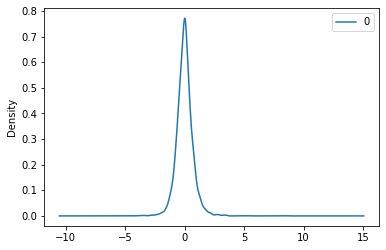

In [158]:
# Plot of residuals
# Density plot chosen to determine bias
residuals_arima2 = pd.DataFrame(results2.resid)
residuals_arima2.plot(kind='kde')
# Summary stats of residuals
print(round(residuals_arima2.describe(),4))

<AxesSubplot:title={'center':'Returns Forecast'}>

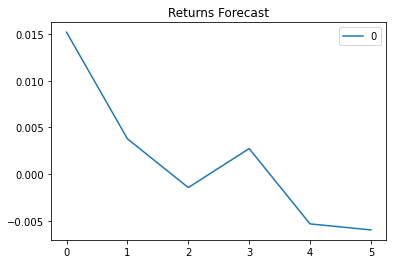

In [159]:
# Plot the 5 Day Returns Forecast
pd.DataFrame(results2.forecast(steps=6)[0]).plot(title="Returns Forecast")

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen futures returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using futures Settle *Returns*, estimate an GARCH model

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [160]:
from arch import arch_model

In [161]:
# Estimate a GARCH model:
model = arch_model(returns.Settle, mean="Zero", vol="GARCH", p=2, q=1)

# Fit the model
results_garch = model.fit(disp="off")

In [162]:
# Summarize the model results
results_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14931.9
Method:            Maximum Likelihood   BIC:                           14959.6
                                        No. Observations:                 7514
Date:                Sun, Aug 15 2021   Df Residuals:                     7514
Time:                        19:51:37   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2896e-03  2.057e-03      2.085  3.708e-02  [2.571e-04,8.322e-03]
alpha[1]       0.0381  1.282e-02      2.970  2.974e-03  [1.295e-02,6.321e-02]
alpha[2]       0.0000  1.703e-02      0.000      1.000 [-3.338e-02,3.338e-02]
beta[1]        0.9536  1.420e-02     67.135      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

               0
count  7514.0000
mean      0.0000
std       0.6919
min      -4.1345
25%      -0.3811
50%      -0.0122
75%       0.3425
max       8.6483


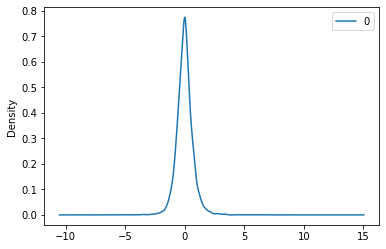

In [163]:
# Plot of residuals
# Density plot chosen to determine bias
residuals_garch = pd.DataFrame(results.resid)
residuals_garch.plot(kind='kde')
# Summary stats of residuals
print(round(residuals_garch.describe(),4))

In [164]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [168]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
forecasts = results.forecast(start=last_day, horizon=forecast_horizon)

TypeError: forecast() got an unexpected keyword argument 'start'

In [169]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434048,7.475745,7.516867,7.557426,7.597434


In [170]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2019-10-15
h.1,7.434048
h.2,7.475745
h.3,7.516867
h.4,7.557426
h.5,7.597434


<AxesSubplot:>

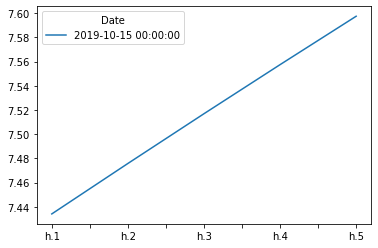

In [171]:
# Plot the final forecast
final.plot()

# Conclusions

Based on your time series analysis, would you buy the yen now?

Based on the forcast from above the risk is expected to increase making the buy decision a risky one to take. This will create resistance in my decision to buy and I would rather keep studying for a better signal in order to buy in. Also, to add to my conclusion the 5 day returns forecast also shows that it would not be a good time to buy since it shows a negative trend with time. 

Is the risk of the yen expected to increase or decrease?

The risk according the last forcast is expected to increse. 

Based on the model evaluation, would you feel confident in using these models for trading?

The ARMIA model showed very small bias which raises my confidence in using this type of model in the future. 